In [27]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# other
import warnings
import lightgbm as lgb

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from feature_engine.encoding import DecisionTreeEncoder, CountFrequencyEncoder, WoEEncoder, RareLabelEncoder

In [43]:
!pip install feature_engine

## Team EarlyBirds, Semicolons 2022

In [ ]:
# HR Attrition Prediction

Link to the dataset:

https://github.com/yogi2022/HR_Attrition_Prediction_Semicolons2022/blob/main/WA_Fn-UseC_-HR-Employee-Attrition.csv

In [2]:
#Load the data 
from google.colab import files # Use to load data on Google Colab 
uploaded = files.upload() # Use to load data on Google Colab

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [46]:
#Store the data into the df variable
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
pd.set_option('display.max_columns', None) 
df.head(10) #Print the first 10 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [45]:
#Get the number of rows and number of columns in the data
df.shape

(1470, 31)

In [6]:
#Get the column data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
#Another check for any null / missing values
df.isnull().values.any()

False

In [9]:
#View some basic statistical details like percentile, mean, standard deviation etc.
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [47]:
numeric_columns = list(df.select_dtypes(include=np.number).columns)
categorical_columns = list(df.select_dtypes(include="object").columns)

In [48]:
df[numeric_columns].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [49]:
df[categorical_columns].describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


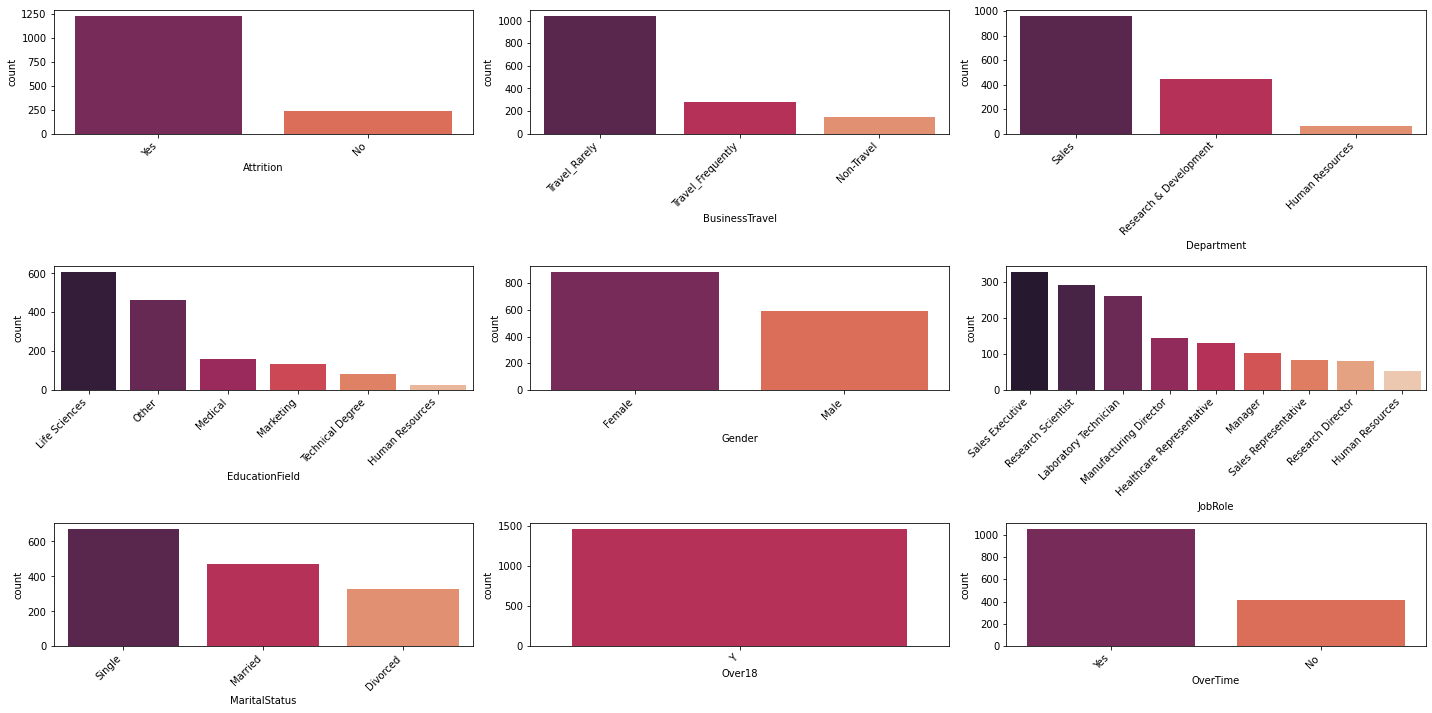

In [50]:
fig, ax = plt.subplots(3,3, figsize = (20,10))

ax = np.ravel(ax)
for i in range(len(categorical_columns)):
    sns.countplot(data = df, x = categorical_columns[i], ax = ax[i], palette="rocket", order = df[categorical_columns[i]].value_counts().index)
    ax[i].set_xticklabels(labels = df[categorical_columns[i]].unique(), rotation=45, ha='right')
ax = np.reshape(ax, (3, 3))
plt.tight_layout()

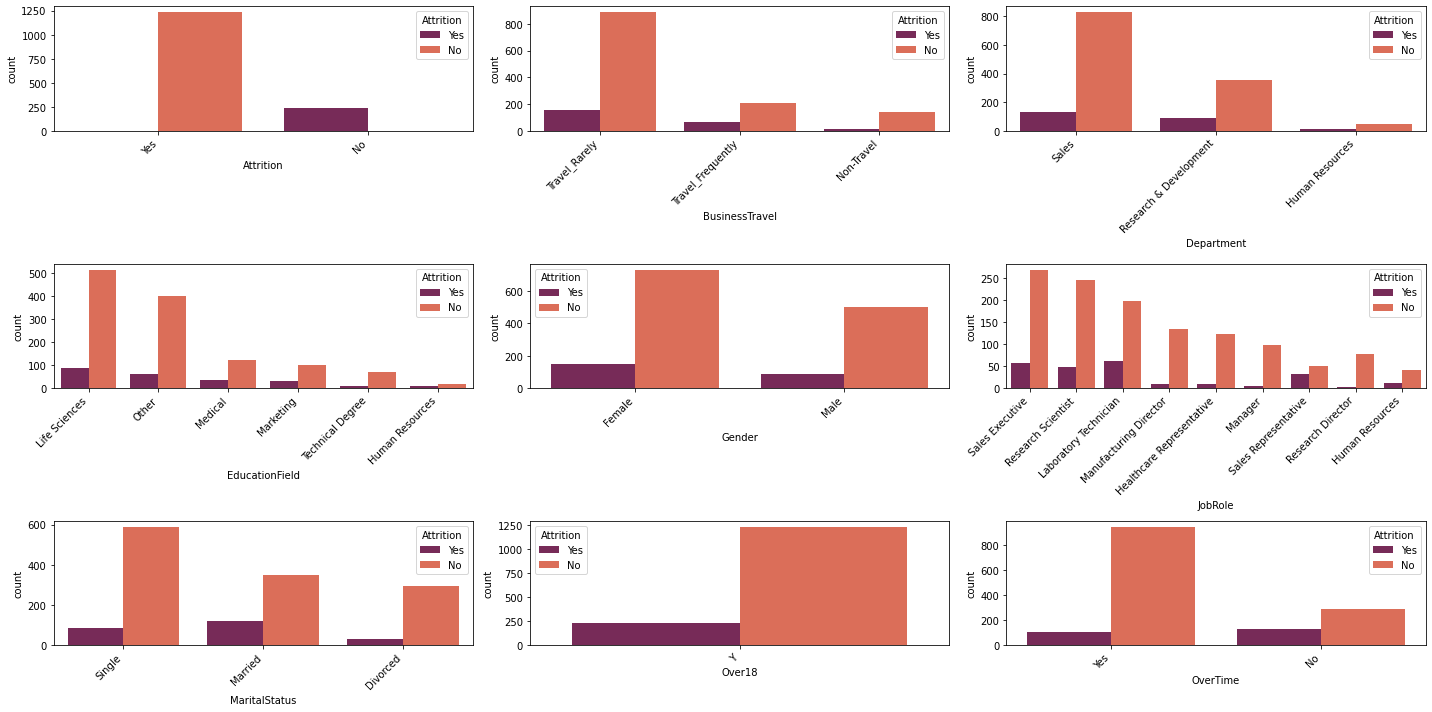

In [51]:
fig, ax = plt.subplots(3,3, figsize = (20,10))

ax = np.ravel(ax)
for i in range(len(categorical_columns)):
    sns.countplot(data = df, x = categorical_columns[i], hue="Attrition", ax = ax[i], palette="rocket", order = df[categorical_columns[i]].value_counts().index)
    ax[i].set_xticklabels(labels = df[categorical_columns[i]].unique(), rotation=45, ha='right')
ax = np.reshape(ax, (3, 3))
plt.tight_layout()

In [52]:
def make_distplot(df, col, ax):
    sns.distplot(df[col], ax = ax)
    ax.axvline(df[col].mean(), linestyle = '--', color = "red")
    ax.axvline(df[col].median(), linestyle = '--', color = "green")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

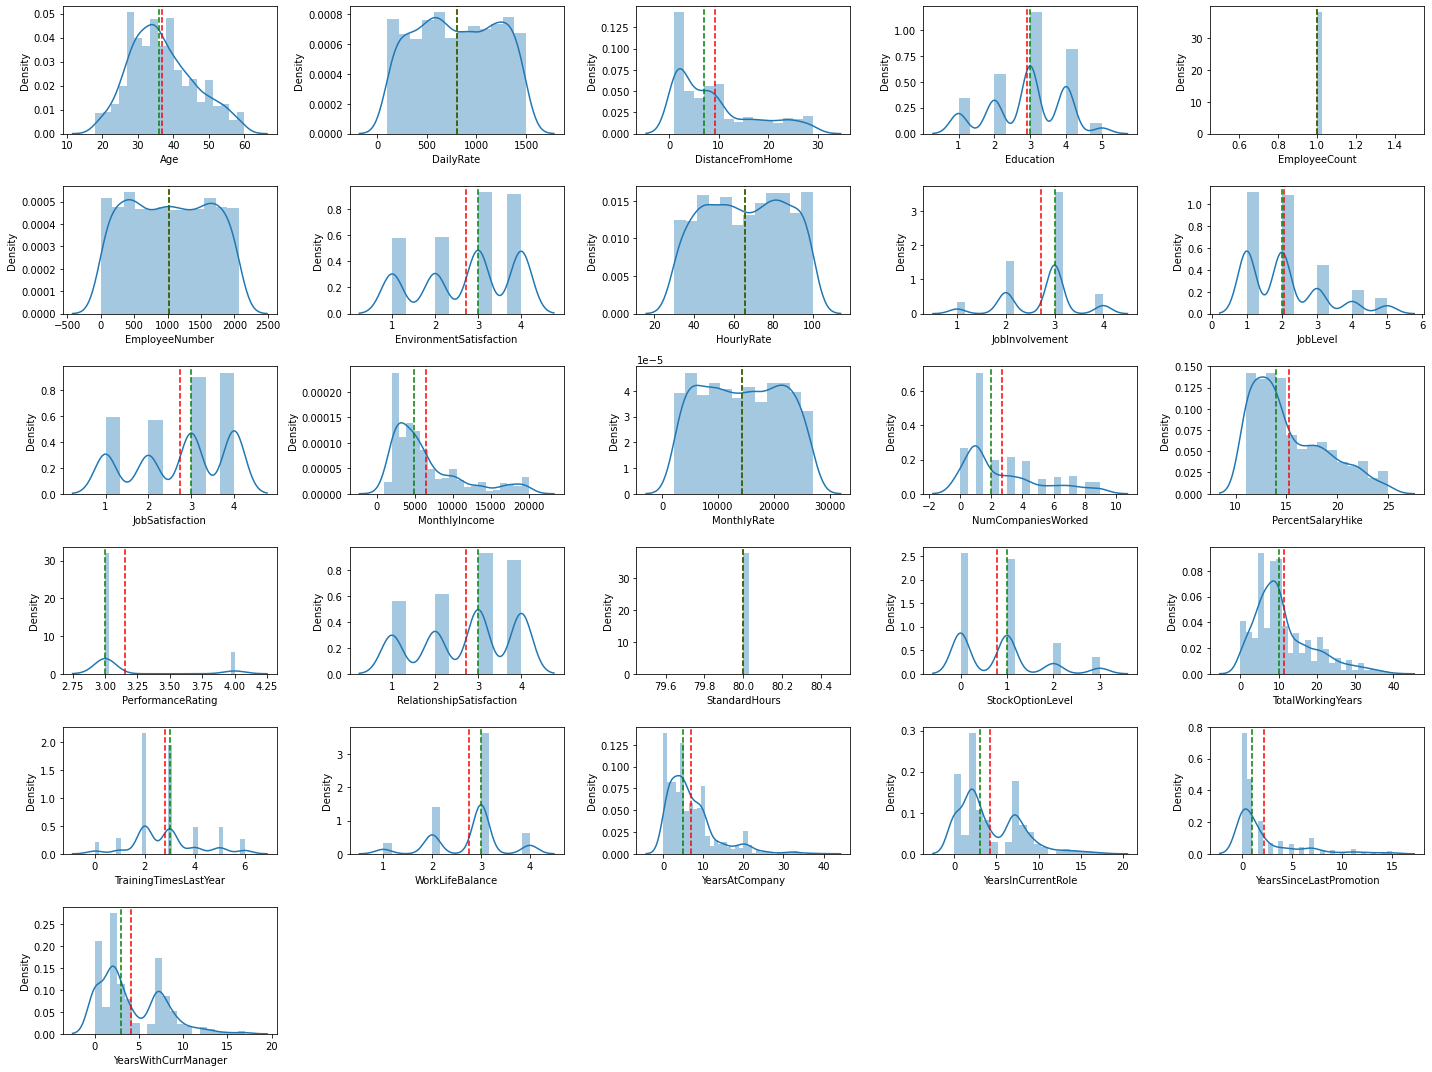

In [53]:
fig, ax = plt.subplots(6,5, figsize = (20,15))

ax = np.ravel(ax)
for i in range(len(numeric_columns)):
    make_distplot(df, numeric_columns[i], ax[i])
for i in range(len(numeric_columns), 6*5):
    ax[i].axis("off")
ax = np.reshape(ax, (6, 5))
plt.tight_layout()

In [10]:
#Get a count of the number of employee attrition, the number of employees that stayed (no) and the number that left (yes)
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


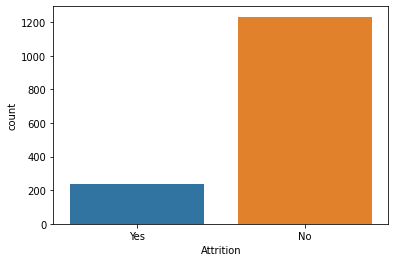

In [11]:
#Visualize this count 
sns.countplot(df['Attrition'])

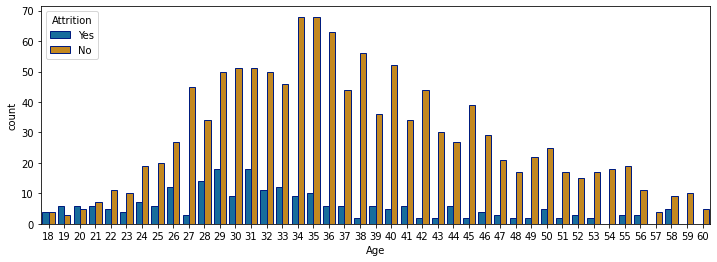

In [12]:
#Show the number of employees that left and stayed by age
import matplotlib.pyplot as plt
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Age', hue='Attrition', data = df, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

The age with the highest count of employee attrition is age 29 & 31. The age with the highest retention is age 34 & 35.

In [13]:
#Print all of the object data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_________________________________________________________________
Gender 

In [14]:
#Remove unneeded columns

#Remove the column EmployeeNumber
df = df.drop('EmployeeNumber', axis = 1) # A number assignment 
#Remove the column StandardHours
df = df.drop('StandardHours', axis = 1) #Contains only value 80 
#Remove the column EmployeeCount
df = df.drop('EmployeeCount', axis = 1) #Contains only the value 1 
#Remove the column EmployeeCount
df = df.drop('Over18', axis = 1) #Contains only the value 'Yes'

In [15]:
#Get the correlation of the columns
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


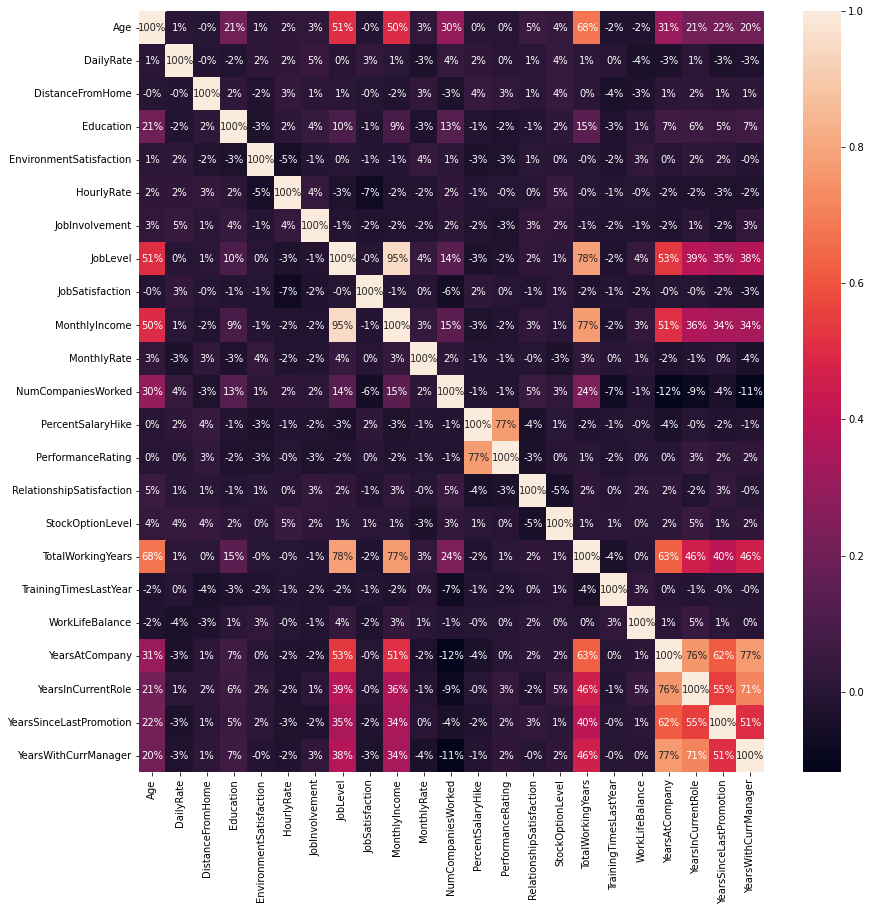

In [16]:
#Visualize the correlation
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [17]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  """


In [18]:
#Create a new column at the end of the dataframe that contains the same value 
df['Age_Years'] = df['Age']
#Remove the first column called age 
df = df.drop('Age', axis = 1)
#Show the dataframe
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,22,1,3,2,1,11,...,2,1,17,3,2,5,2,0,3,18
1466,0,2,327,1,5,0,3,3,1,12,...,0,1,9,5,2,7,7,1,7,21
1467,0,2,39,1,3,2,1,1,1,57,...,1,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,1,2,3,3,1,33,...,3,0,17,3,1,9,6,0,8,31


In [19]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 1:df.shape[1]].values 
Y = df.iloc[:, 0].values 

In [20]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [22]:
#Use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [23]:
#Get the accuracy on the training data
forest.score(X_train, Y_train)

0.9791288566243194

In [24]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[309   1]
 [ 49   9]]
Model Testing Accuracy = "0.8641304347826086!"



In [25]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
MonthlyIncome,0.071
Age_Years,0.067
DailyRate,0.067
MonthlyRate,0.055
HourlyRate,0.052
TotalWorkingYears,0.051
YearsWithCurrManager,0.048
JobRole,0.044
DistanceFromHome,0.042


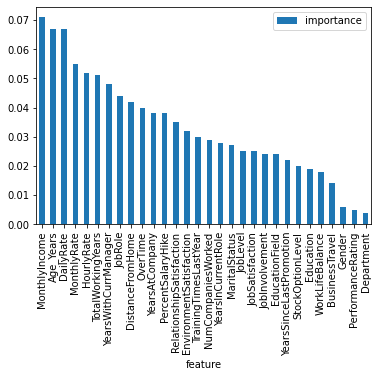

In [26]:
#Visualize the importance
importances.plot.bar()